In [1]:
import os
import pandas as pd
import numpy as np
from bjontegaard_metric import BD_RATE, BD_PSNR
from utils import split_dataframe, mean_dataframe
from plot import plot_curves

In [2]:
from test import update, compare

In [3]:
csvdir1='csvfiles/reporting_template_lossy.csv'
csvdir2='csvfiles/test.csv'
xlabel='bppGeo'
ylabel='d1T'

### 1. update csvfile: (calculate bpp)

In [4]:
df1 = pd.read_csv(csvdir1)
df1 = update(df1)
df1.to_csv(csvdir1, index=False)

In [5]:
df2 = pd.read_csv(csvdir2)
df2 = update(df2)
df2.to_csv(csvdir2, index=False)

### 2. split concatenated frames to single frame for comparisons

In [6]:
df1_set = split_dataframe(df1)
df2_set = split_dataframe(df2)

### 3. plot rd curves and bdrate for each sequence in csvdir2

['queen_0200', 'soldier_vox10_0690', 'facade_00064_vox11', 'dancer_vox11_00000001', 'thaidancer_viewdep_vox12', 'ford_02_q1mm', 'ford_03_q1mm']
seqs_name:	 queen_0200
bdrate:	 -63.22
save figure to  figs/queen_0200_bppGeo_d1T_-63.png
seqs_name:	 soldier_vox10_0690
bdrate:	 -58.18
save figure to  figs/soldier_vox10_0690_bppGeo_d1T_-58.png
seqs_name:	 facade_00064_vox11
bdrate:	 -62.85
save figure to  figs/facade_00064_vox11_bppGeo_d1T_-63.png
seqs_name:	 dancer_vox11_00000001
bdrate:	 -54.24
save figure to  figs/dancer_vox11_00000001_bppGeo_d1T_-54.png
seqs_name:	 thaidancer_viewdep_vox12
bdrate:	 -48.37
save figure to  figs/thaidancer_viewdep_vox12_bppGeo_d1T_-48.png
seqs_name:	 ford_02_q1mm
bdrate:	 -29.57
save figure to  figs/ford_02_q1mm_bppGeo_d1T_-30.png
seqs_name:	 ford_03_q1mm
bdrate:	 -28.63
save figure to  figs/ford_03_q1mm_bppGeo_d1T_-29.png


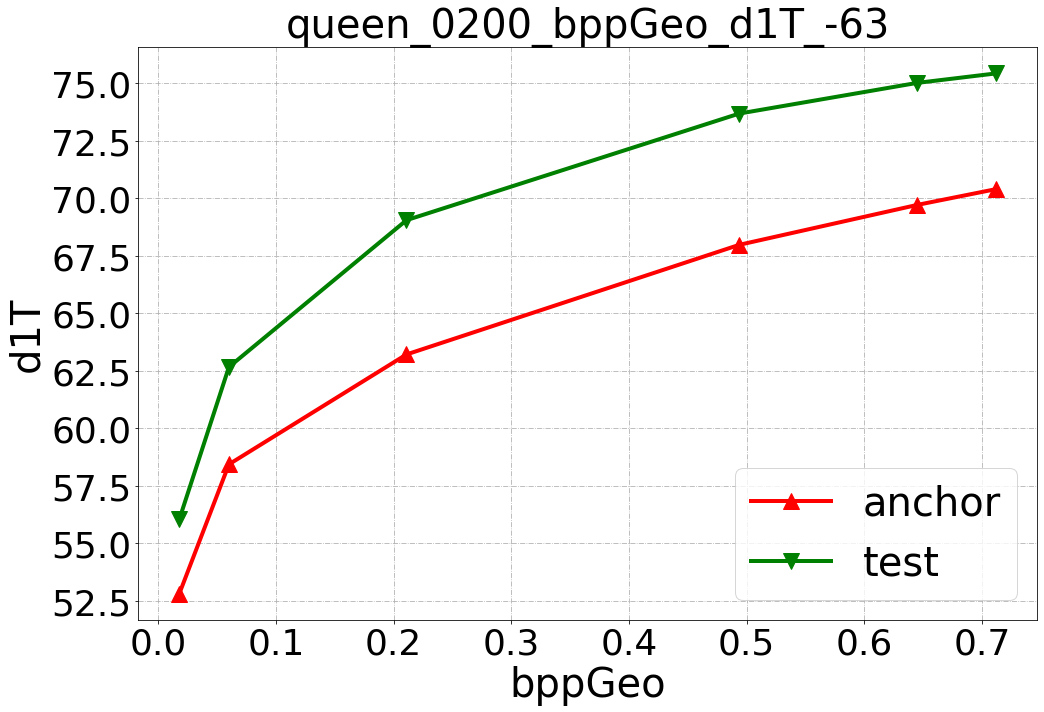

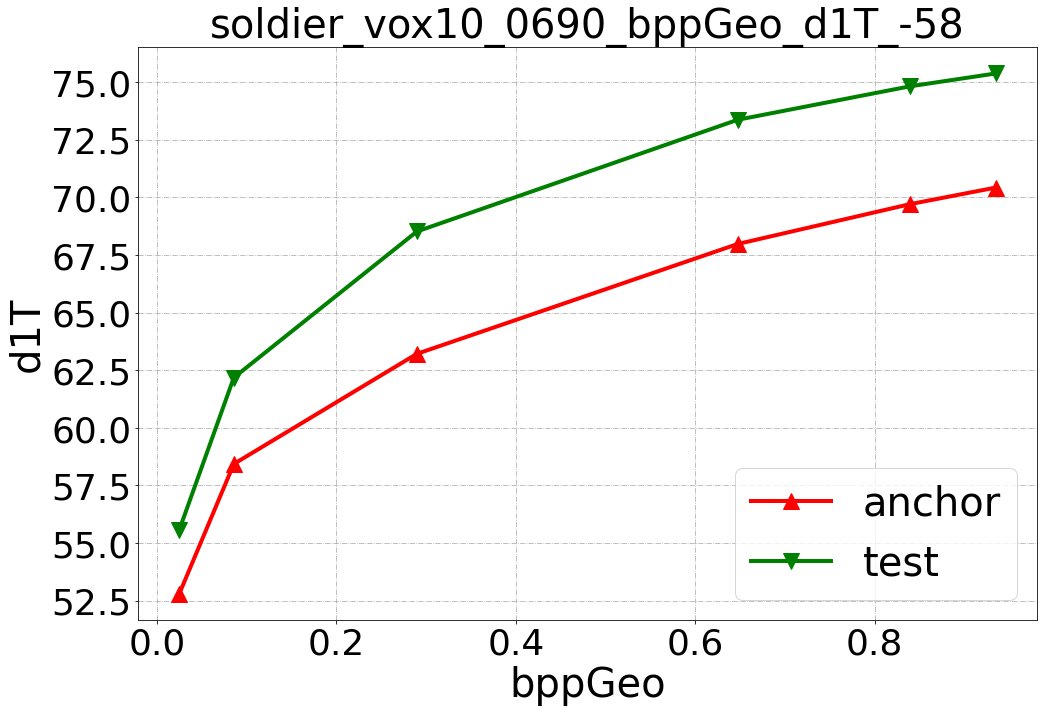

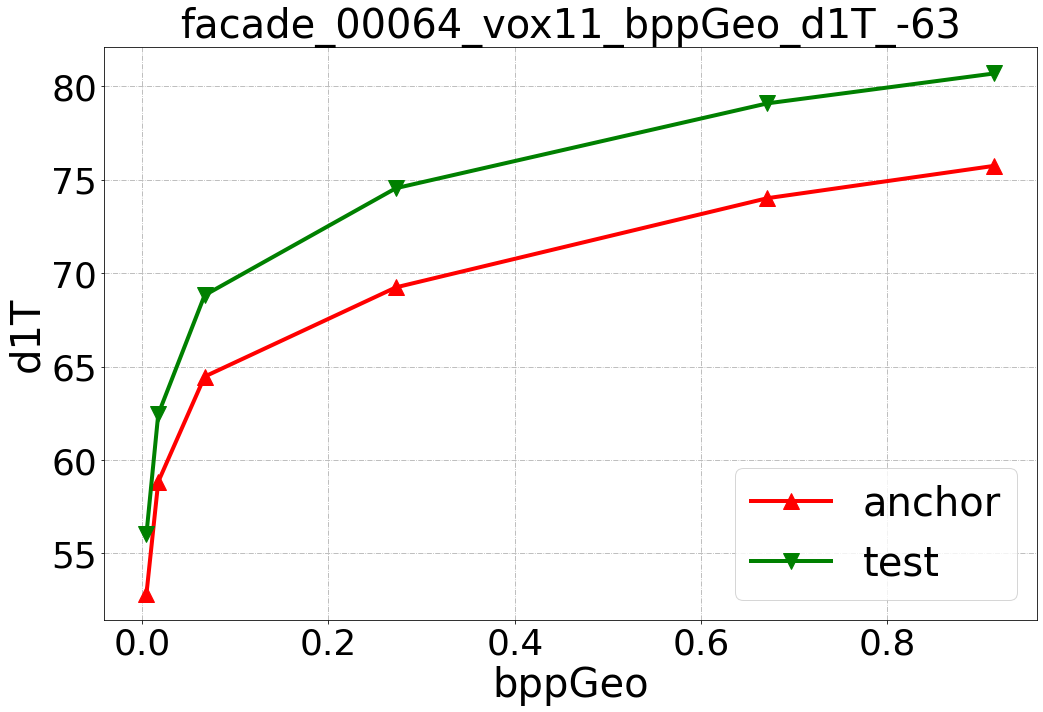

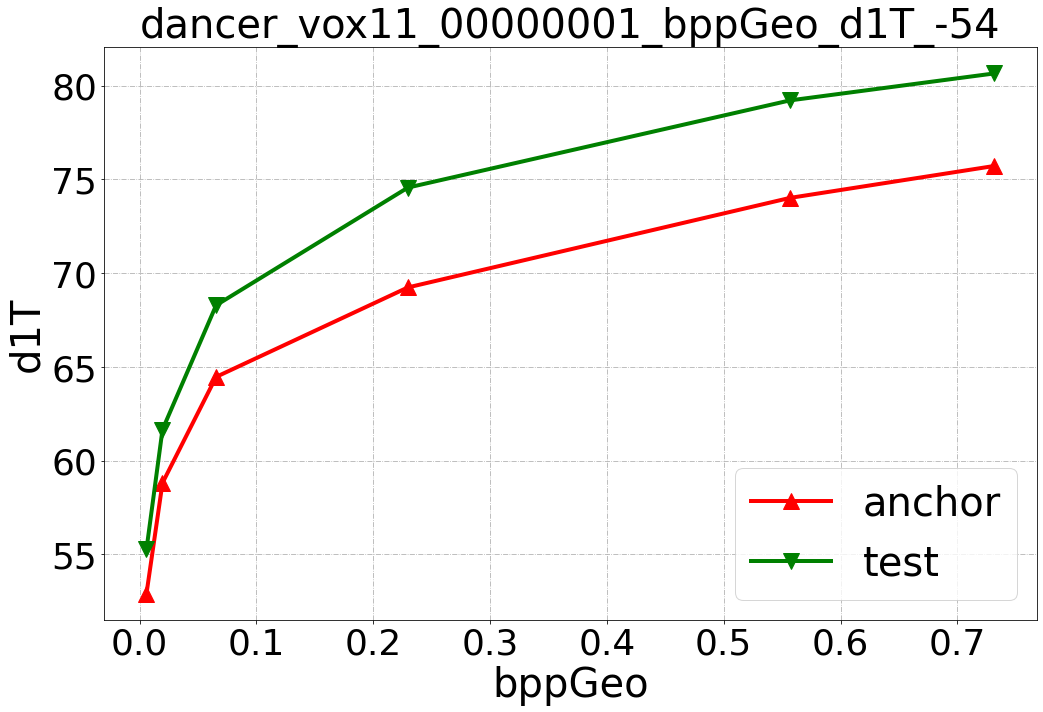

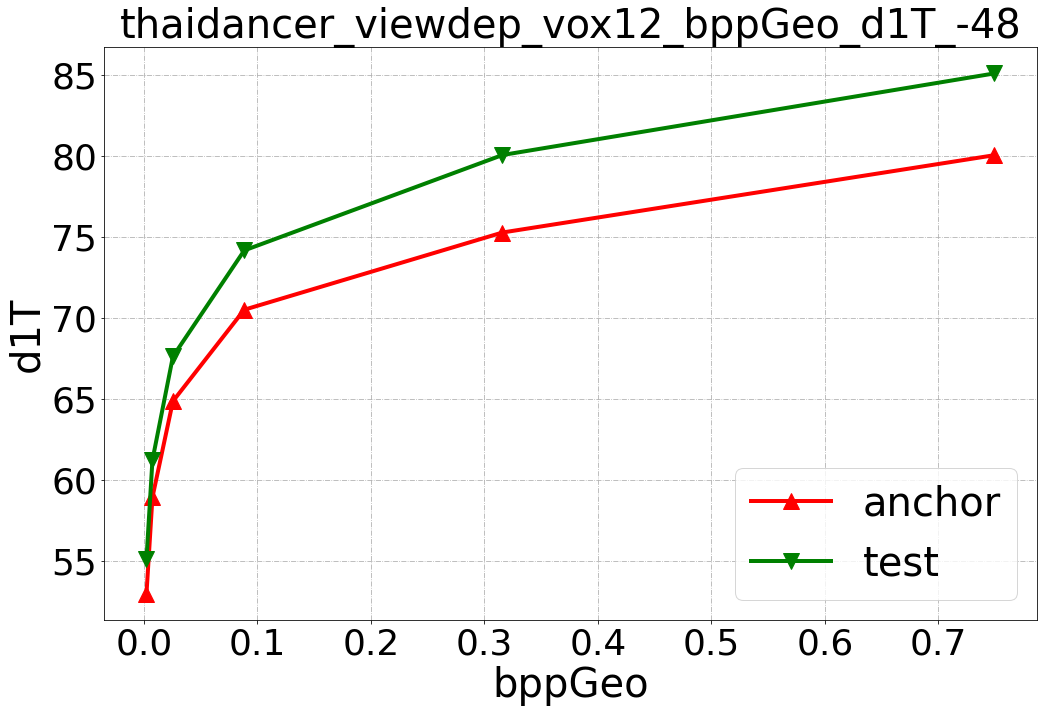

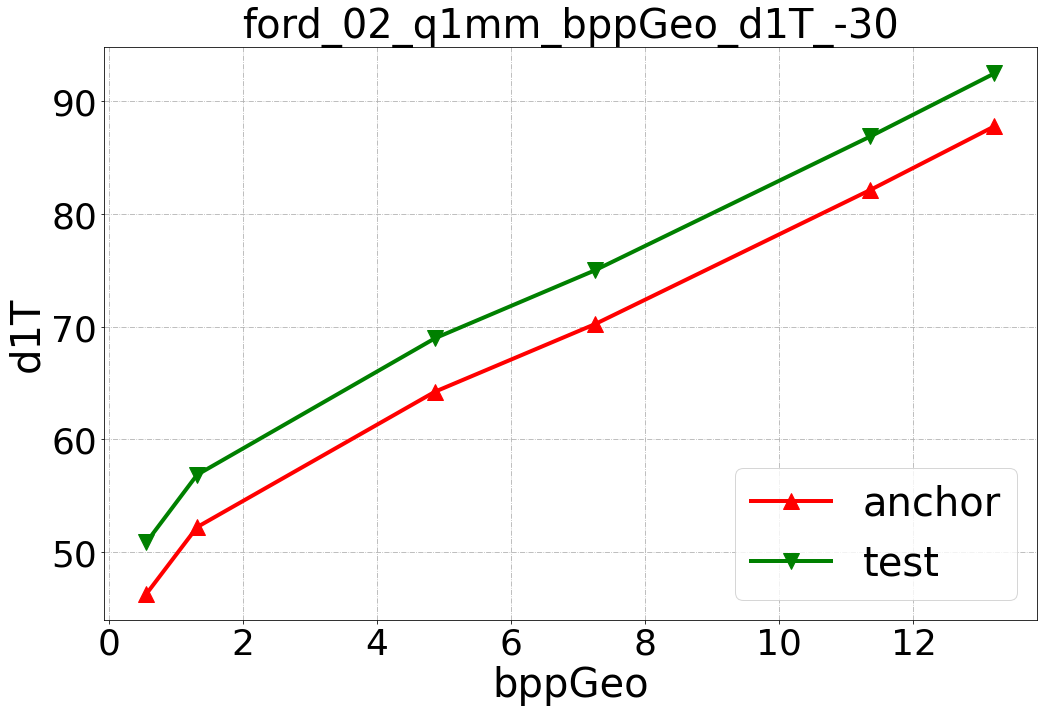

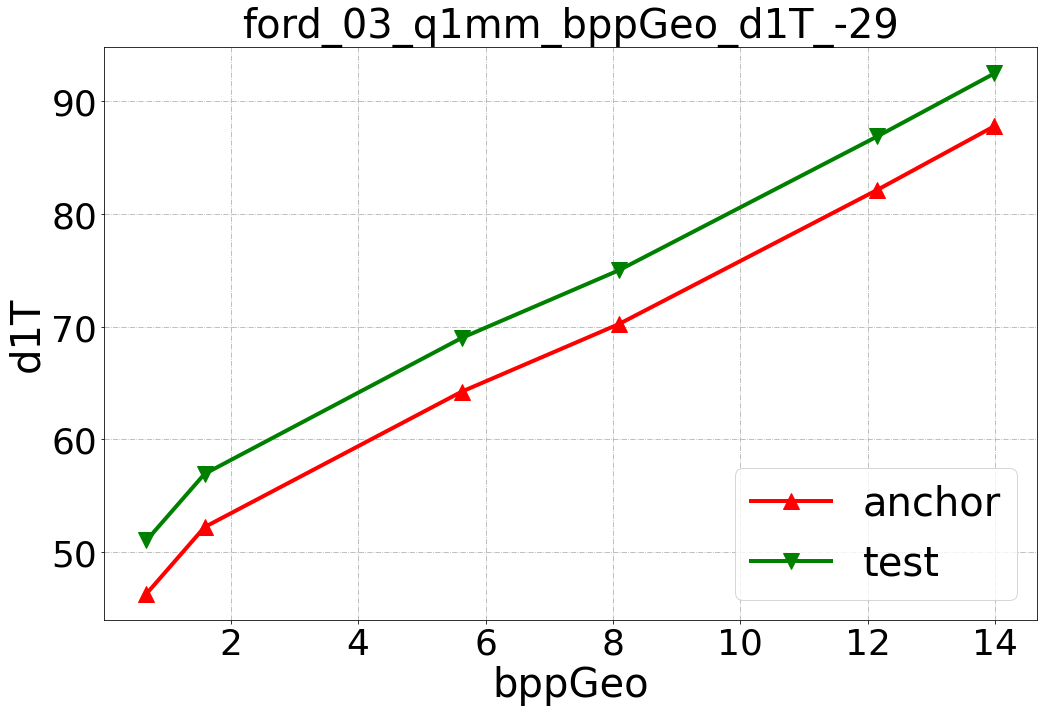

In [7]:
sequence_list = list(df2_set.keys())
print(sequence_list)
for _, seqs_name in enumerate(sequence_list):
    print('seqs_name:\t', seqs_name)
    df1_one = df1_set[seqs_name]
    df2_one = df2_set[seqs_name]
    # print(df1_one, '\n', df2_one)
    compare(df1_one, df2_one, xlabel, ylabel, seqs_name)

### 4. average results

In [11]:
sequence_list = ['queen_0200', 
            'soldier_vox10_0690', 
            'dancer_vox11_00000001', 
            'thaidancer_viewdep_vox12']
# sequence_list = ['ford_02_q1mm', 'ford_03_q1mm']

In [9]:
df1_list = [df1_set[seqs_name] for seqs_name in sequence_list]
df2_list = [df2_set[seqs_name] for seqs_name in sequence_list]

df1_mean = mean_dataframe(df1_list)
df2_mean = mean_dataframe(df2_list)
# print('df1_mean\n', df1_mean)
# print('df2_mean\n', df2_mean)

bdrate:	 -28.63
save figure to  figs/mean_bppGeo_d1T_-29.png


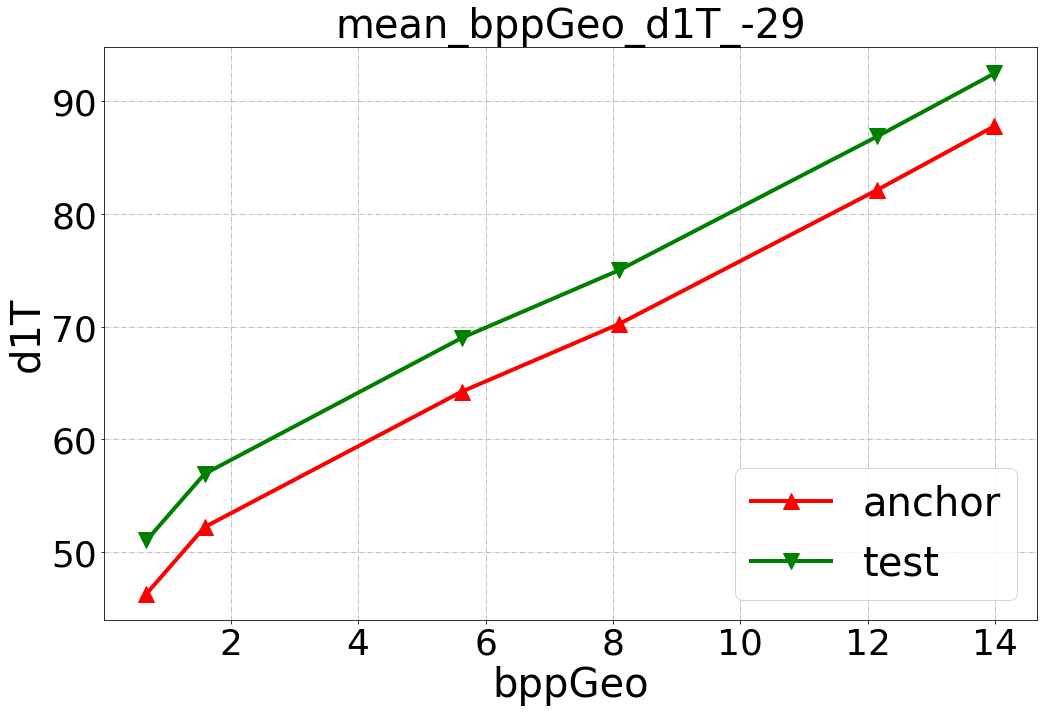

In [10]:
compare(df1_one, df2_one, xlabel, ylabel, 'mean')